Proyecto 2 - Introducción a la Ciencia de los Datos: Análisis de Precios de Aguacate
Equipo: Kevin Steven Ramirez Torres 2259371 Diego Alejandro Tolosa Sanchez
1. Análisis Descriptivo del Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use('ggplot')
%matplotlib inline

# Cargar datos
avocado = pd.read_csv('../data/avocado.csv')
avocado.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Estadisticas descriptivas

In [2]:
avocado.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,NaN,NaN,NaN,24.232232,15.481045,0.0,10.0,24.0,38.0,52.0
Date,18249,169,2015-12-27,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveragePrice,18249.0,NaN,NaN,NaN,1.405978,0.402677,0.44,1.1,1.37,1.66,3.25
Total Volume,18249.0,NaN,NaN,NaN,850644.013009,3453545.355399,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,NaN,NaN,NaN,293008.424531,1264989.081763,0.0,854.07,8645.3,111020.2,22743616.17
4225,18249.0,NaN,NaN,NaN,295154.568356,1204120.401135,0.0,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,NaN,NaN,NaN,22839.735993,107464.068435,0.0,0.0,184.99,6243.42,2546439.11
Total Bags,18249.0,NaN,NaN,NaN,239639.20206,986242.399216,0.0,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,NaN,NaN,NaN,182194.686696,746178.514962,0.0,2849.42,26362.82,83337.67,13384586.8
Large Bags,18249.0,NaN,NaN,NaN,54338.088145,243965.964547,0.0,127.47,2647.71,22029.25,5719096.61


Histograma de precios

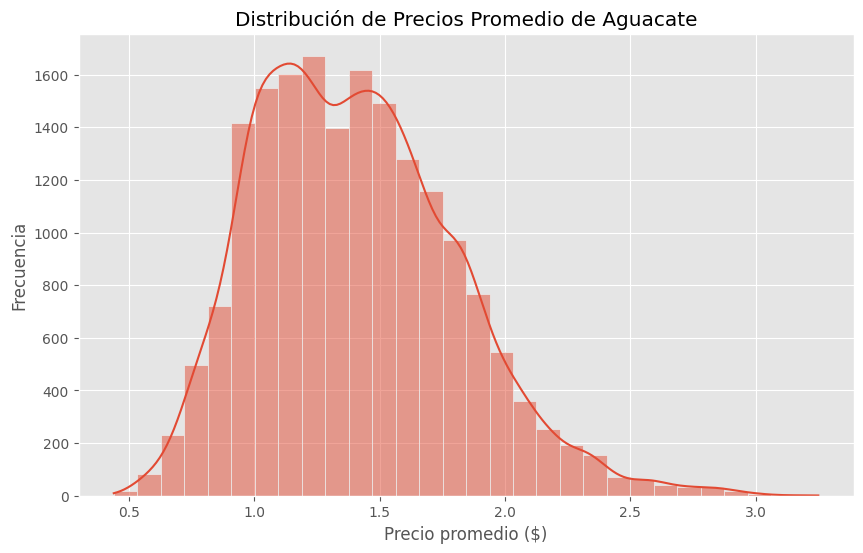

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(avocado['AveragePrice'], bins=30, kde=True)
plt.title('Distribución de Precios Promedio de Aguacate')
plt.xlabel('Precio promedio ($)')
plt.ylabel('Frecuencia')
plt.show()

Boxplot por año

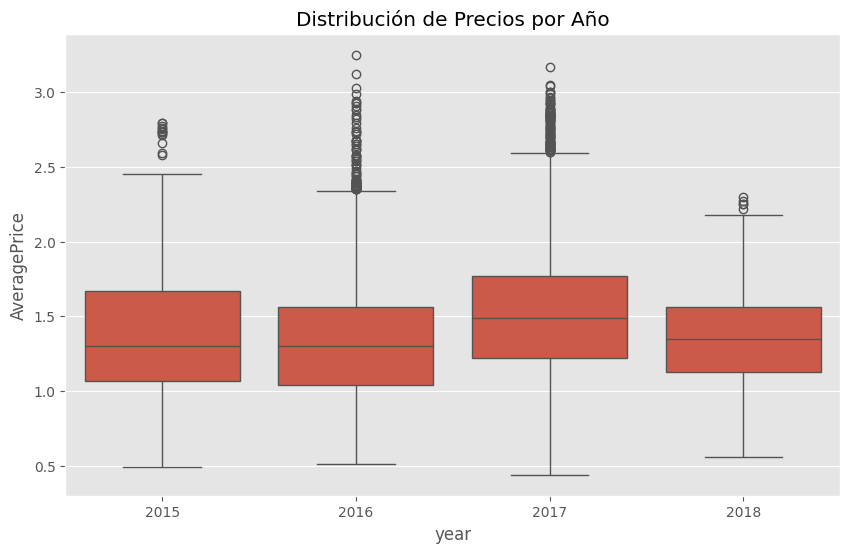

In [4]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=avocado, x='year', y='AveragePrice')
plt.title('Distribución de Precios por Año')
plt.show()

Correlación entre variables numéricas


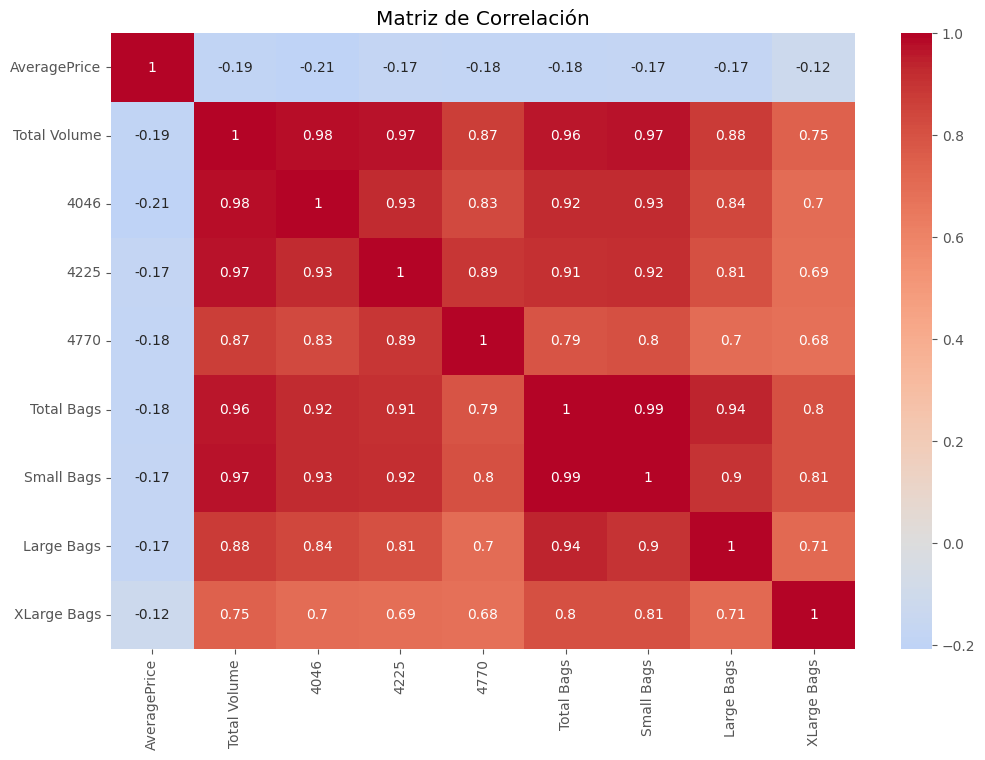

In [5]:
numeric_cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 
               'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
corr_matrix = avocado[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación')
plt.show()

Precio por region top 10

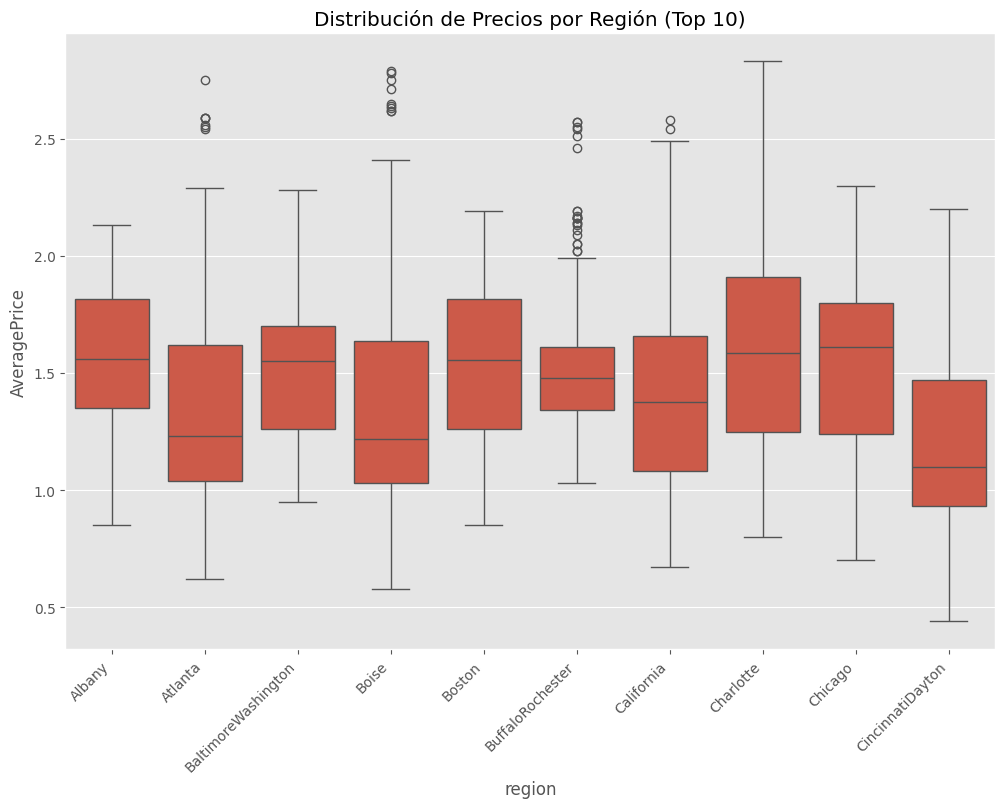

In [6]:
top_regions = avocado['region'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.boxplot(data=avocado[avocado['region'].isin(top_regions)], 
            x='region', y='AveragePrice')
plt.xticks(rotation=45, ha='right')
plt.title('Distribución de Precios por Región (Top 10)')
plt.show()